In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as Logit
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_validate
from sklearn.utils import resample

### 團體第一題

In [2]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_wine
import pandas as pd

In [3]:
wine = load_wine()
X = wine.data
y = wine.target
X.shape

(178, 13)

In [4]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2)

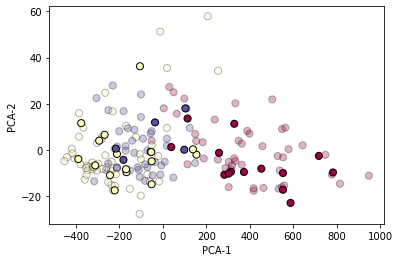

In [5]:
pca = PCA(n_components=2)
pca.fit(Xtr)
Xtr_proj = pca.transform(Xtr)
Xte_proj = pca.transform(Xte)

plt.scatter(Xtr_proj[:,0],Xtr_proj[:,1],s=50,c=ytr,cmap=plt.cm.Spectral,edgecolors='black',alpha=0.3)
plt.scatter(Xte_proj[:,0],Xte_proj[:,1],s=50,c=yte,cmap=plt.cm.Spectral,edgecolors='black')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.show()

In [6]:
RLModel=Logit(C=1,solver='lbfgs',multi_class='auto')
RLModel.fit(Xtr_proj,ytr)
acc = RLModel.score(Xte_proj,yte)
print(f"PCA_acc: {acc}")

PCA_acc: 0.6944444444444444


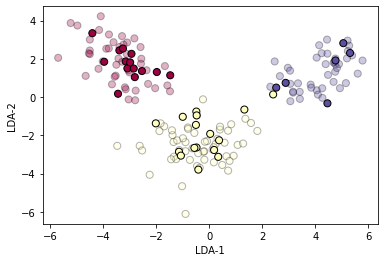

In [7]:
lda = LDA(n_components=2)
lda.fit(Xtr,ytr)
Xtr_proj = lda.transform(Xtr)
Xte_proj = lda.transform(Xte)

plt.scatter(Xtr_proj[:,0],Xtr_proj[:,1],s=50,c=ytr,cmap=plt.cm.Spectral,edgecolors='black',alpha=0.3)
plt.scatter(Xte_proj[:,0],Xte_proj[:,1],s=50,c=yte,cmap=plt.cm.Spectral,edgecolors='black')
plt.xlabel('LDA-1')
plt.ylabel('LDA-2')
plt.show()

In [8]:
RLModel=Logit(C=1,solver='lbfgs',multi_class='auto')
RLModel.fit(Xtr_proj,ytr)
acc = RLModel.score(Xte_proj,yte)
print(f"LDA_acc: {acc}")

LDA_acc: 0.9722222222222222


In [9]:
RLModel=Logit(C=1,solver='liblinear',multi_class='auto')
RLModel.fit(Xtr,ytr)
acc = RLModel.score(Xte,yte)
print(f"baseline_acc: {acc}")

baseline_acc: 0.9444444444444444


### 團體第二題

In [10]:
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans 

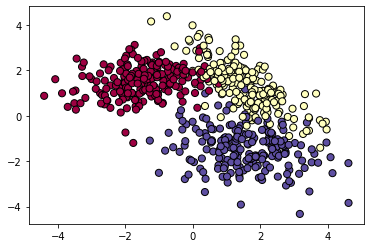

In [11]:
X, y = make_classification(600,n_features=2,n_informative=2,n_redundant=0,
                           n_classes=3,n_clusters_per_class=1,flip_y=0,
                           class_sep=1.5,random_state=2)
plt.scatter(X[:,0],X[:,1],s=50,c=y,cmap=plt.cm.Spectral,edgecolors='black')
plt.show()

In [12]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
logistic = Logit(solver='lbfgs',multi_class='auto')
logistic.fit(X_tr,y_tr)
acc = logistic.score(X_te,y_te)
print('Logistic Regression:',acc)

knn = KNN(n_neighbors=1, weights='uniform')
knn.fit(X_tr,y_tr)
acc = knn.score(X_te,y_te)
print('1-NN:',acc)

Logistic Regression: 0.925
1-NN: 0.9083333333333333


In [14]:
n = 3
class_0 = KMeans(n_clusters=n,init='random',random_state=0)
class_0.fit(X_tr[y_tr==0,:])

class_1 = KMeans(n_clusters=n,init='random',random_state=0)
class_1.fit(X_tr[y_tr==1,:])

class_2 = KMeans(n_clusters=n,init='random',random_state=0)
class_2.fit(X_tr[y_tr==2,:])

KMeans(init='random', n_clusters=3, random_state=0)

In [15]:
new_xtr = np.vstack((class_0.cluster_centers_,class_1.cluster_centers_,class_2.cluster_centers_))
print(new_xtr.shape)
new_ytr = np.hstack((np.zeros(n),np.ones(n),2*np.ones(n)))
print(new_ytr.shape)

(9, 2)
(9,)


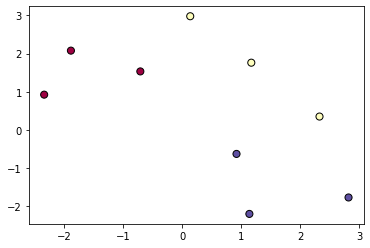

In [16]:
plt.scatter(new_xtr[:,0],new_xtr[:,1],s=50,c=new_ytr,cmap=plt.cm.Spectral,edgecolors='black')
plt.show()

In [17]:
logistic = Logit(solver='lbfgs',multi_class='auto')
logistic.fit(new_xtr,new_ytr)
acc = logistic.score(X_te,y_te)
print('Logistic Regression:',acc)

knn = KNN(n_neighbors=1, weights='uniform')
knn.fit(new_xtr,new_ytr)
acc = knn.score(X_te,y_te)
print('1-NN:',acc)

Logistic Regression: 0.9083333333333333
1-NN: 0.9166666666666666


### 團體第三題

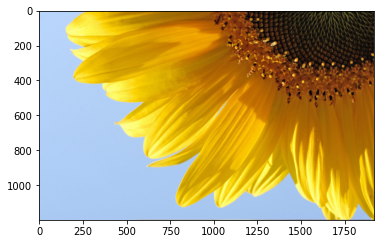

In [30]:
from PIL import Image
import numpy as np
im = Image.open("Girassol4.jpeg")
plt.imshow(im)
# im.show() # 擇一

In [22]:
img = np.asarray(im)

In [23]:
mat = np.zeros((1200*1920,3))

In [24]:
idx=0
for i in range(1200):
    for j in range(1920):
        mat[idx] = img[i,j,:]
        idx=idx+1

In [25]:
n_clusters=3
km = KMeans(n_clusters=n_clusters,init='random',random_state=0)
km.fit(mat)

KMeans(init='random', n_clusters=3, random_state=0)

In [26]:
newmat = np.zeros((1200,1920,n_clusters))
idx=0
for i in range(1200):
    for j in range(1920):
        newmat[i,j,:]=km.labels_[idx]
        idx=idx+1

In [27]:
newim = Image.fromarray(np.uint8(newmat/n_clusters*255))

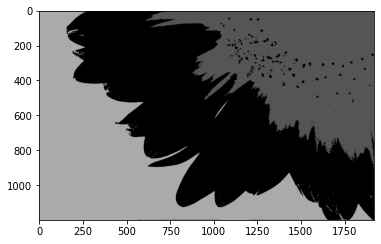

In [29]:
plt.imshow(newim)
# newim.show() # 擇一

### 團體第四題

In [33]:
from sklearn.datasets import load_digits
import matplotlib.cm as cm

In [34]:
digit = load_digits()
X = digit.data
y = digit.target

In [35]:
lda = LDA(n_components=2)
lda.fit(X,y)
X_proj = lda.transform(X)

<Figure size 432x288 with 0 Axes>

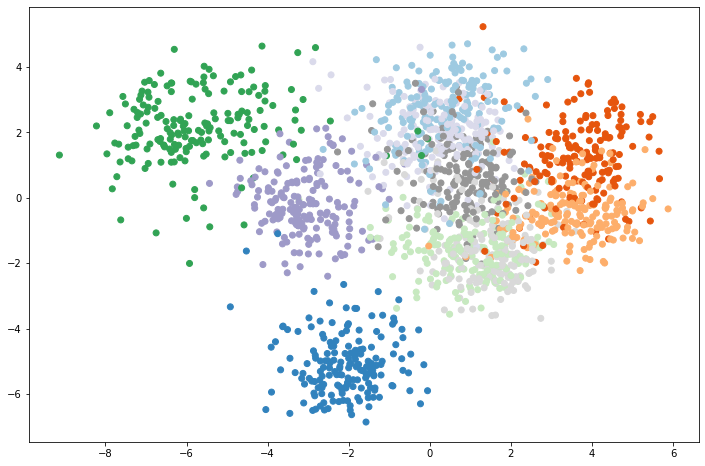

In [65]:
plt.set_cmap('tab20c')
plt.figure(figsize=(12, 8))
plt.scatter(X_proj[:,0],X_proj[:,1],c=y)

<Figure size 432x288 with 0 Axes>

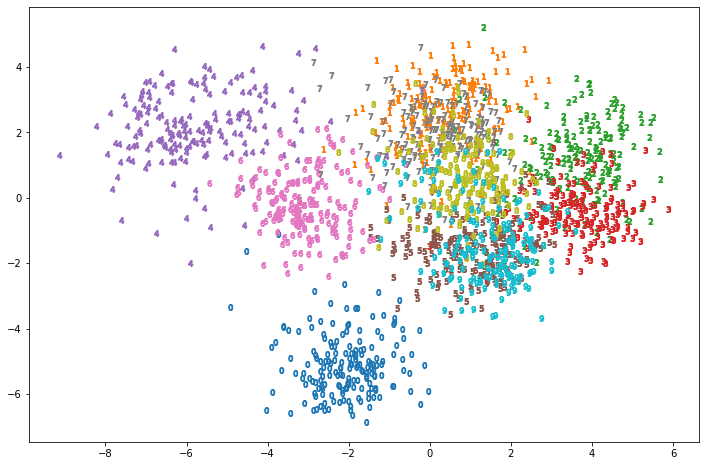

In [64]:
plt.set_cmap('tab20c')
plt.figure(figsize=(12, 8))
for n in set(y):
    plt.scatter(X_proj[np.where(y == n),0],X_proj[np.where(y == n),1], marker=f"${n}$")
plt.show()